![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Optimization Methods </center>
## <center> Lecture 5 - Majorization Minimization </center>
### <center> Metric MDS </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/OptimizationMethods/05_MajorizationMinimization/MainMMDS.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

## Exercise
Implement the following `MetricMDS` function:
```python
#============================================
def MetricMDS(mΔx, d=2, maxIter=500, ε=1e-6):
#============================================
```
**Notes:**

* $\boldsymbol{\Delta}_{x}[i,j] = \left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}$
* Stop iterate after `maxIter` or if $\left\Vert \widetilde{\boldsymbol{Z}}^{\left(t\right)}-\boldsymbol{Z}^{\left(t\right)}\right\Vert _{F}\leq\epsilon$.
* (Optinal) return the function value after each iteration<br>
(and make sure it is monotonically decreasing)
* (Optinal) compare your performance with sk-learn's performance.

<div class="alert alert-block alert-danger">
<span style="color:black">
    
* In Python, the dimension are swapped, that is: $\boldsymbol{Z}\in\mathbb{R}^{N\times d}$.
</span>
</div>

<div class="alert alert-block alert-warning">
<span style="color:black">
    
### Metric MDS:
$$
\min_{\boldsymbol{Z}}f\left(\boldsymbol{Z}\right)=\min_{\boldsymbol{Z}}\left\Vert \boldsymbol{\Delta}_{x}-\boldsymbol{D}_{z}\right\Vert _{F}^{2}
$$
1. **set** some initial point $\boldsymbol{Z}^{\left(0\right)}\in\mathbb{R}^{N\times d}$.
2. **repeat** (until convergences):
     1. **set** $\widetilde{\boldsymbol{Z}}=\boldsymbol{Z}^{\left(t\right)}$
     2. **set** $\boldsymbol{B}=\boldsymbol{C}-\text{diag}\left(\boldsymbol{C}\boldsymbol{1}\right)$<br>
     where: $\boldsymbol{C}\left[i,j\right]:=\begin{cases}
0 & i=j\\
-\frac{\boldsymbol{\Delta}_{x}\left[i,j\right]}{\widetilde{\boldsymbol{D}}_{\tilde{z}}\left[i,j\right]} & i\neq j
\end{cases}$
     3. **set** $\boldsymbol{Z}^{\left(t+1\right)}=\frac{1}{N}\boldsymbol{B}\widetilde{\boldsymbol{Z}}$

</span>
</div>

In [3]:
from scipy.spatial.distance import cdist

def MetricMDS(mΔx, d=2, maxIter=200, ε=1e-6):
    '''
    =============================================================================
    Applies metric-MDS
    Args:
        mΔx - Training pair-wise distances,                mΔx.shape = (N, N)
    Output:
        mZ  - Low-dimensional representation (embeddings), mZ.shape  = (N, d)
        vF  - The objective value after each iteration     vF.shape  = (T,)
    =============================================================================
    '''
    vF = np.full(maxIter, np.nan)
    N  = mΔx.shape[0]
    mZ = np.random.randn(N, d)
    for ii in range(maxIter):
        mZt  = mZ
        mDz  = cdist(mZt, mZt)
        mC   = -mΔx / mDz
        np.fill_diagonal(mC, 0)
        mB   = mC - np.diag(mC.sum(0))
        mZ   = 1 / N * mB @ mZt 

        vF[ii] = np.linalg.norm(mΔx - mDz)
        if np.linalg.norm(mZ - mZt) < ε:
            break

    return mZ, np.array(vF)

### Test your implementation
#### Load the digits dataset:

In [4]:
from sklearn.datasets import load_digits

mX, vY = load_digits(return_X_y=True)

mX.shape, vY.shape

((1797, 64), (1797,))

#### Apply your metric MDS:

In [5]:
%%time
from sklearn.metrics  import pairwise_distances

mΔx    = pairwise_distances(mX, metric='l2')
mZ, vF = MetricMDS(mΔx, d=2)

C:\Users\Or\AppData\Local\Temp/ipykernel_4388/3311996823.py:20: RuntimeWarning: invalid value encountered in true_divide
  mC   = -mΔx / mDz


Wall time: 29.2 s


#### Plot results:

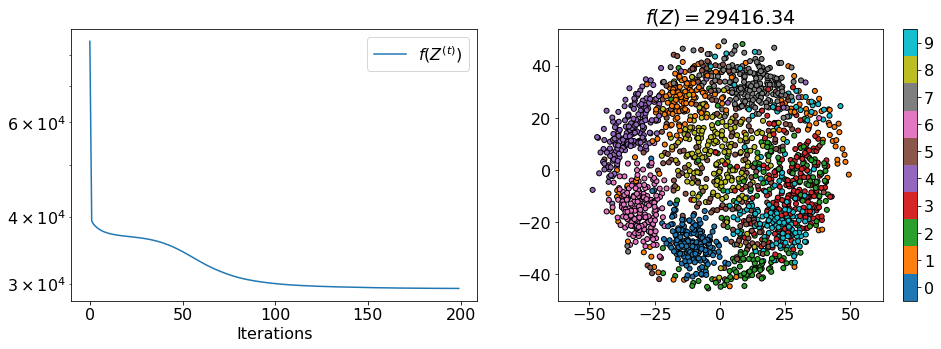

In [6]:
mDz  = cdist(mZ, mZ)
fVal = np.linalg.norm(mΔx - mDz)

_, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].plot      (vF, label='$f(Z^{(t)})$')
ax[0].set_xlabel('Iterations')
ax[0].set_yscale('log')
ax[0].legend    ()

h = ax[1].scatter(*mZ.T, s=25, c=vY, edgecolor='k', cmap='tab10', vmin=-1/2, vmax=9.5)
ax[1].axis       ('equal')
ax[1].set_title  (f'$f(Z) = {fVal:.2f}$')
plt.colorbar     (h, ticks=range(10))
plt.show         ()

#### Apply Sk-learn's metric MDS:

In [7]:
from sklearn.manifold import MDS

In [8]:
%%time
mZ = MDS(dissimilarity='precomputed', n_init=1).fit_transform(mΔx)

Wall time: 43.7 s


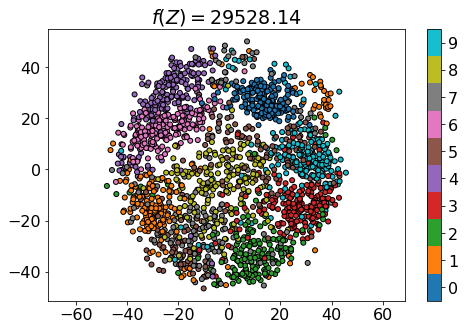

In [9]:
mDz  = cdist(mZ, mZ)
fVal = np.linalg.norm(mΔx - mDz)

_, ax = plt.subplots(1, 1, figsize=(8, 5))

h = ax.scatter(*mZ.T, s=25, c=vY, edgecolor='k', cmap='tab10', vmin=-1/2, vmax=9.5)
ax.set_title  (f'$f(Z) = {fVal:.2f}$')
ax.axis       ('equal')
plt.colorbar  (h, ticks=range(10))
plt.show      ()